* To look at Rmix and spatial distribution every five days given a month.

In [1]:
import numpy as np
import netCDF4 as nc
from salishsea_tools import (
    nc_tools,
    viz_tools,
    tidetools,
    stormtools
)
import datetime, os
from glob import glob
from IPython.core.display import Image,display
from nowcast import figures
import matplotlib.pyplot as plt
import pytz 
import StraTimeSeries as sts
import R_mixStuff as RS
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
%matplotlib inline

In [2]:
grid6 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
X = grid6.variables['nav_lon'][:, :]
Y = grid6.variables['nav_lat'][:, :]
bathy = grid6.variables['Bathymetry'][:, :]

In [3]:
river_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_T.nc')
river_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_U.nc')
river_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_V.nc')
notide_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_T.nc')
notide_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_U.nc')
notide_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_V.nc')
nowind_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_T.nc')
nowind_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_U.nc')
nowind_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_V.nc')
nof_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_T.nc')
nof_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_U.nc')
nof_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_V.nc')
all_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_T.nc')
all_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_U.nc')
all_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_V.nc')

# Salinity Stratification

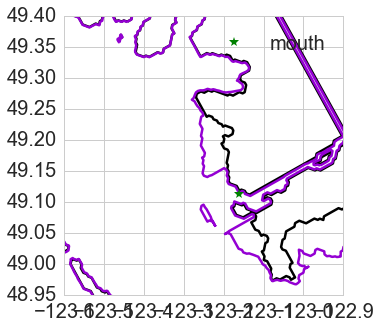

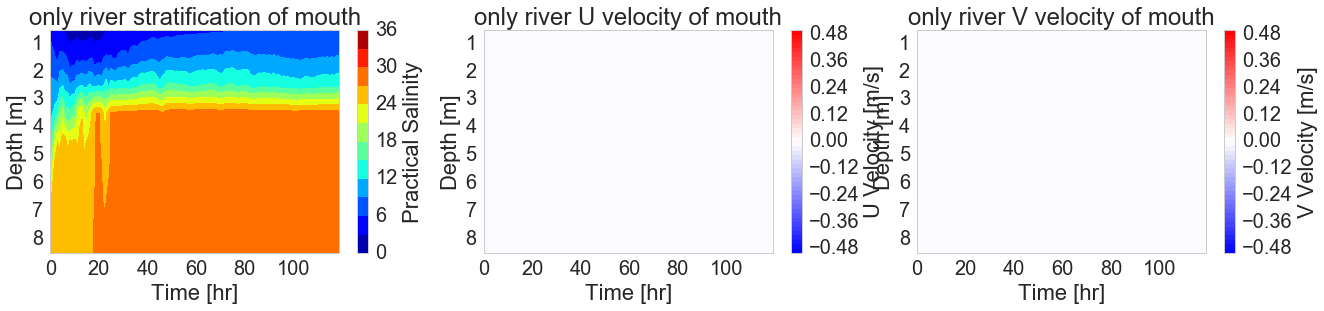

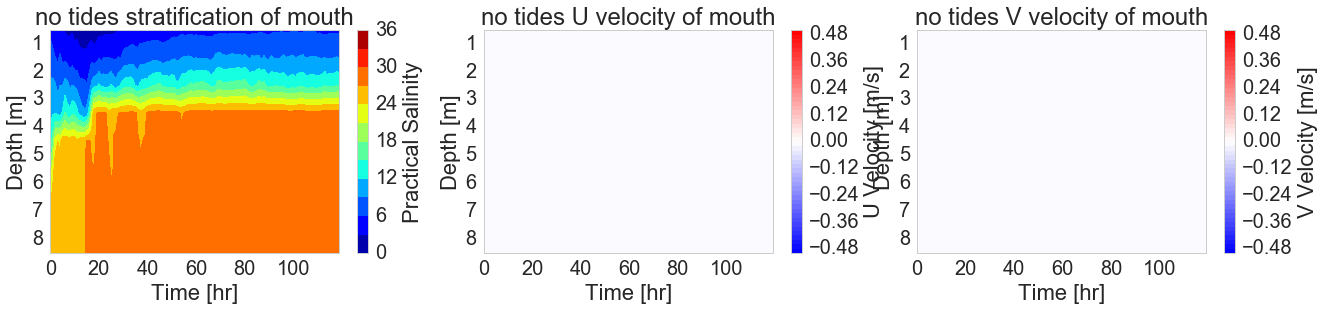

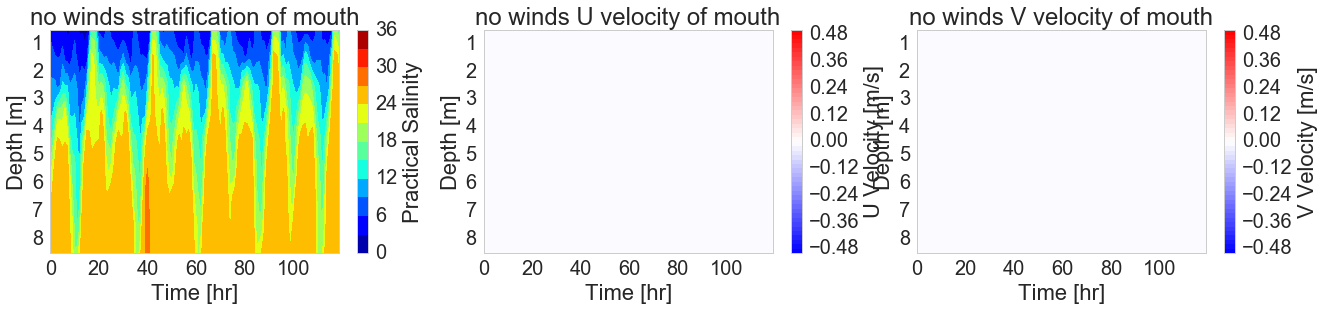

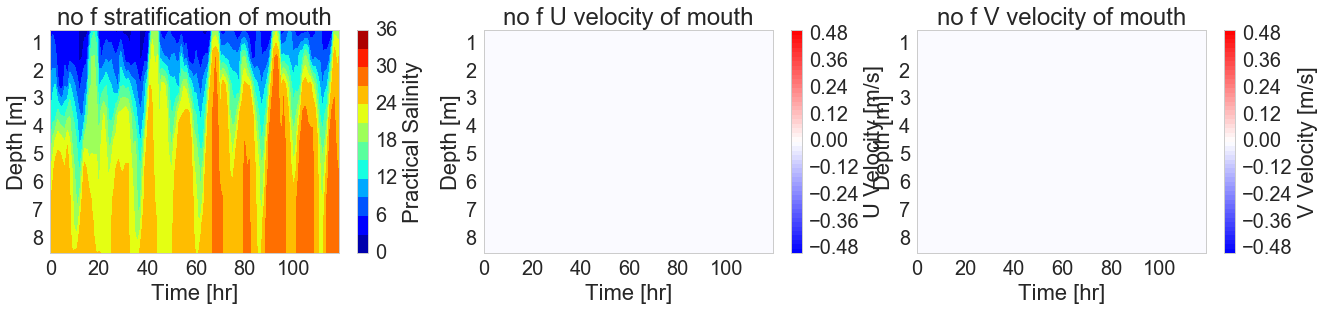

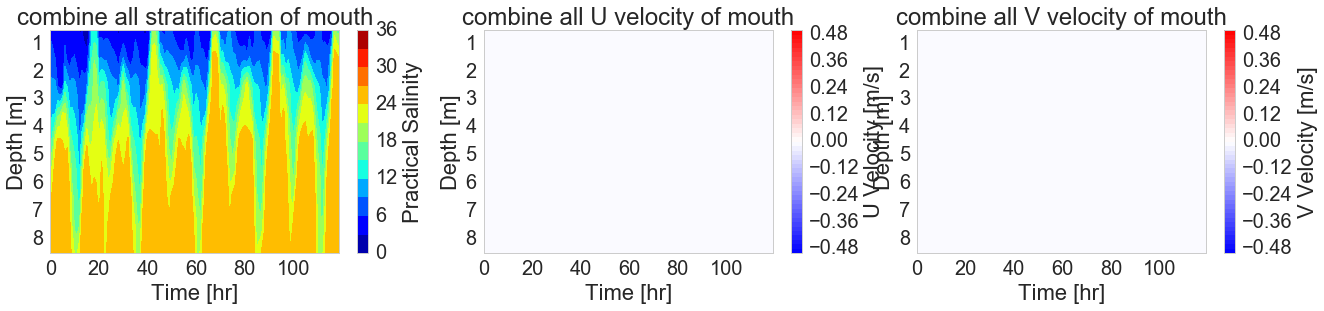

In [4]:
sts.plot_stn('mouth')
fig = sts.plot_stratification_current('mouth',8,'only river',river_T,river_U,river_V,0,119)
fig = sts.plot_stratification_current('mouth',8,'no tides',notide_T,notide_U,notide_V,0,119)
fig = sts.plot_stratification_current('mouth',8,'no winds',nowind_T,nowind_U,nowind_V,0,119)
fig = sts.plot_stratification_current('mouth',8,'no f',nof_T,nof_U,nof_V,0,119)
fig = sts.plot_stratification_current('mouth',8,'combine all',all_T,all_U,all_V,0,119)

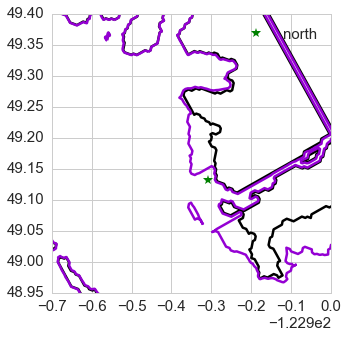

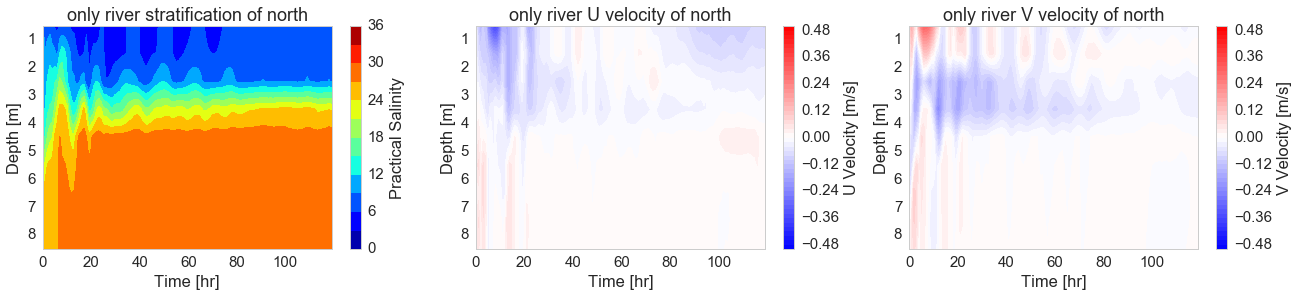

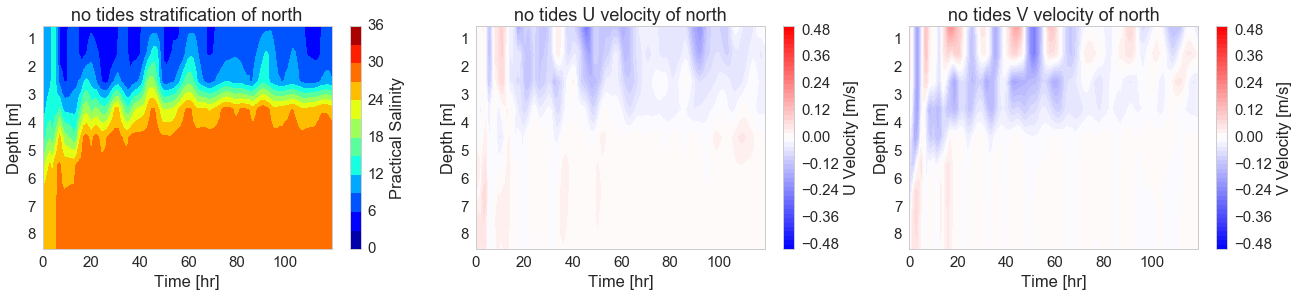

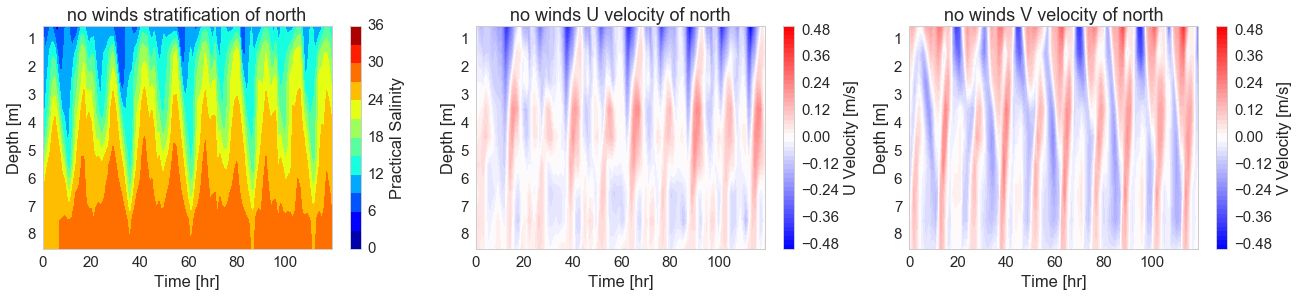

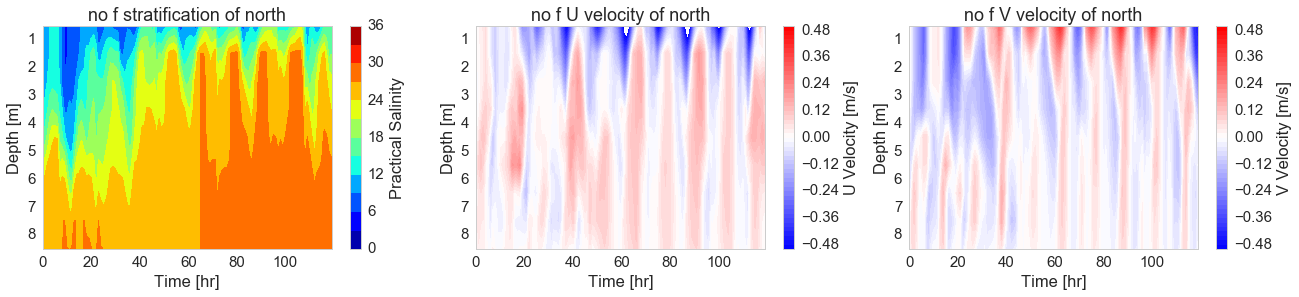

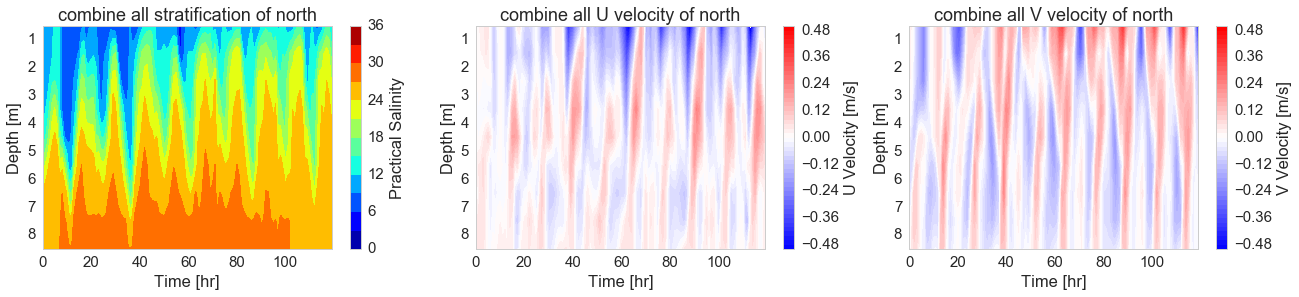

In [5]:
sts.plot_stn('north')
fig = sts.plot_stratification_current('north',8,'only river',river_T,river_U,river_V,0,119)
fig = sts.plot_stratification_current('north',8,'no tides',notide_T,notide_U,notide_V,0,119)
fig = sts.plot_stratification_current('north',8,'no winds',nowind_T,nowind_U,nowind_V,0,119)
fig = sts.plot_stratification_current('north',8,'no f',nof_T,nof_U,nof_V,0,119)
fig = sts.plot_stratification_current('north',8,'combine all',all_T,all_U,all_V,0,119)

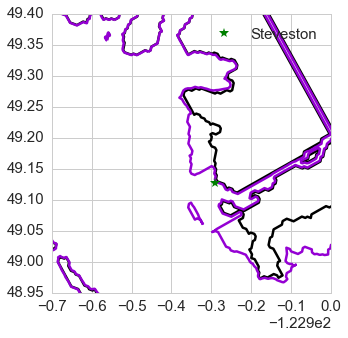

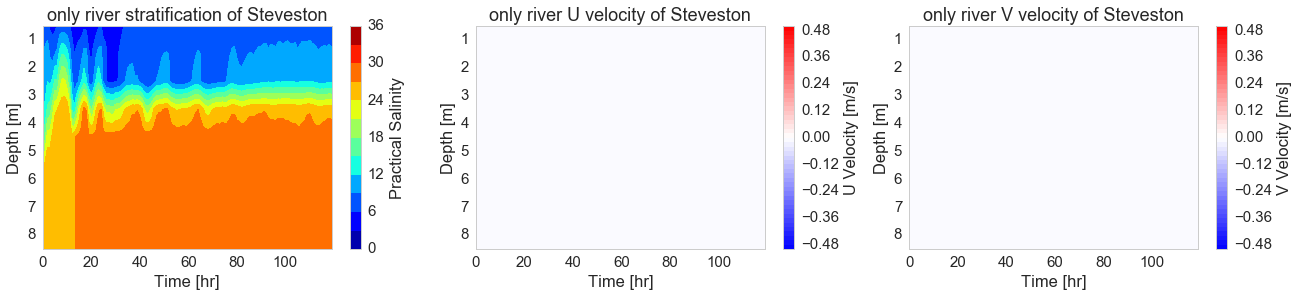

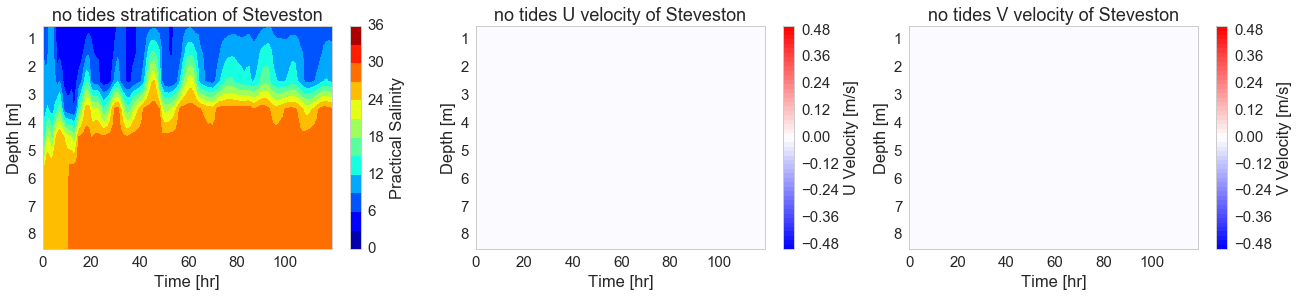

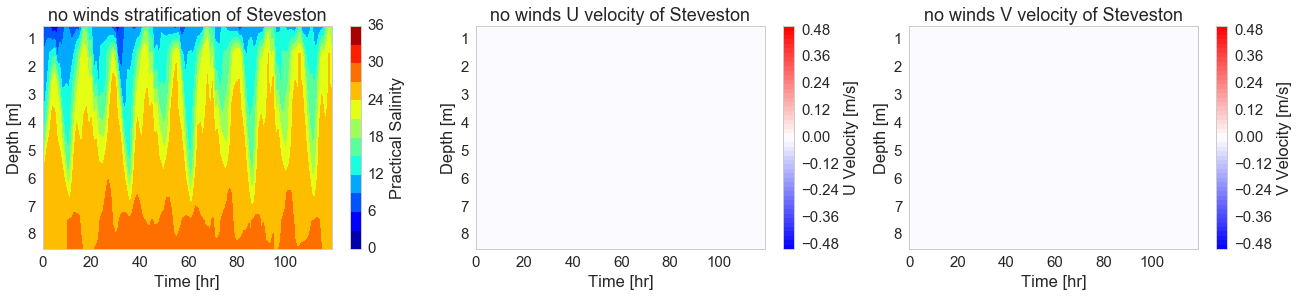

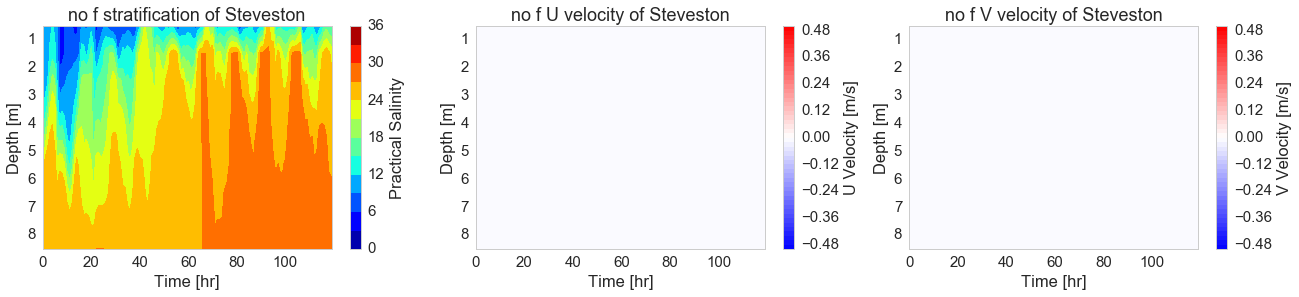

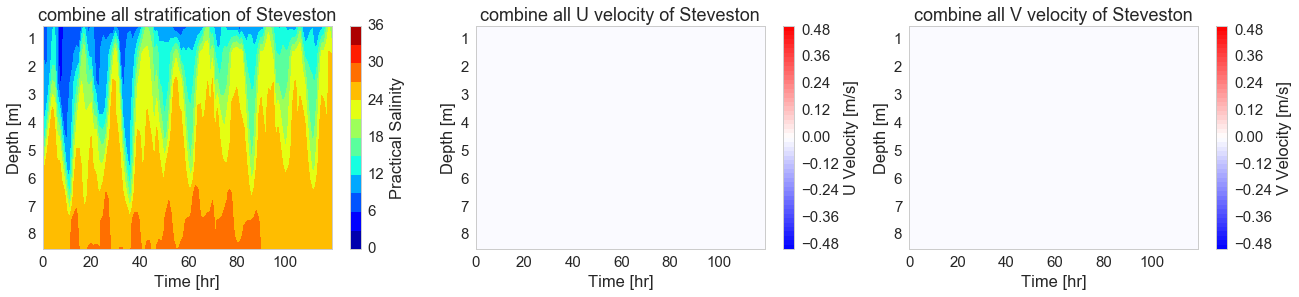

In [6]:
sts.plot_stn('Steveston')
fig = sts.plot_stratification_current('Steveston',8,'only river',river_T,river_U,river_V,0,119)
fig = sts.plot_stratification_current('Steveston',8,'no tides',notide_T,notide_U,notide_V,0,119)
fig = sts.plot_stratification_current('Steveston',8,'no winds',nowind_T,nowind_U,nowind_V,0,119)
fig = sts.plot_stratification_current('Steveston',8,'no f',nof_T,nof_U,nof_V,0,119)
fig = sts.plot_stratification_current('Steveston',8,'combine all',all_T,all_U,all_V,0,119)

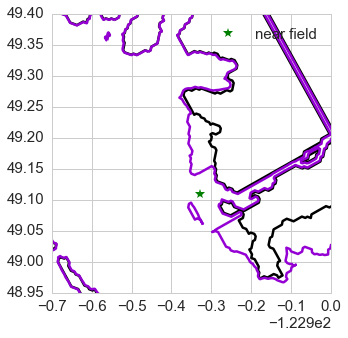

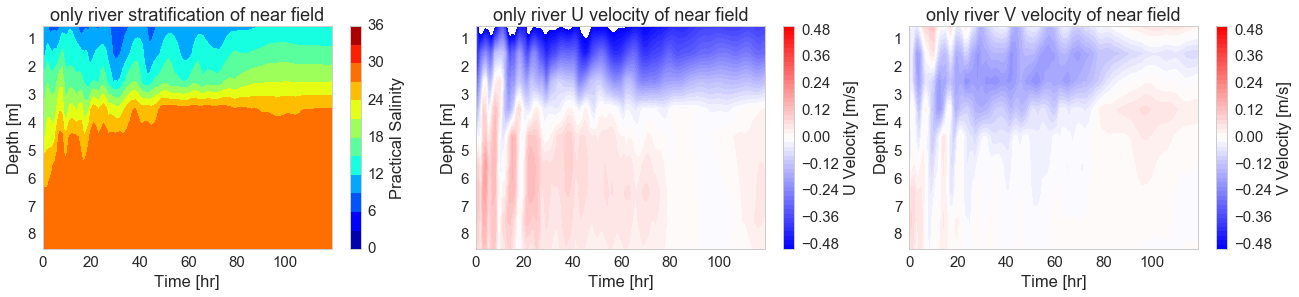

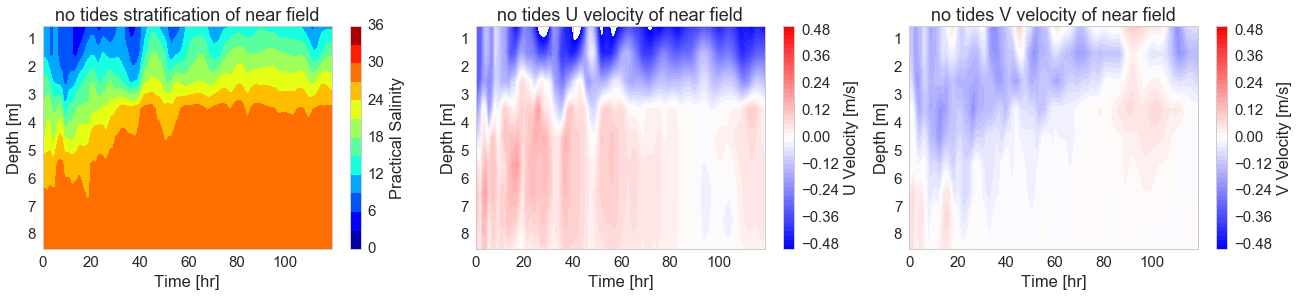

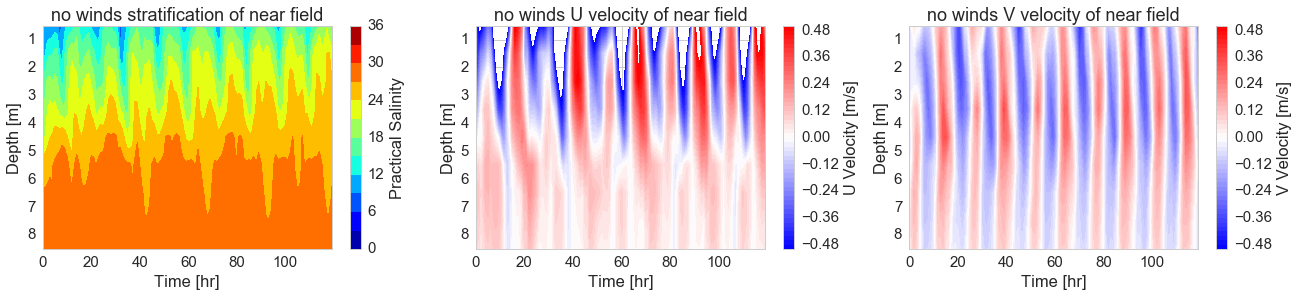

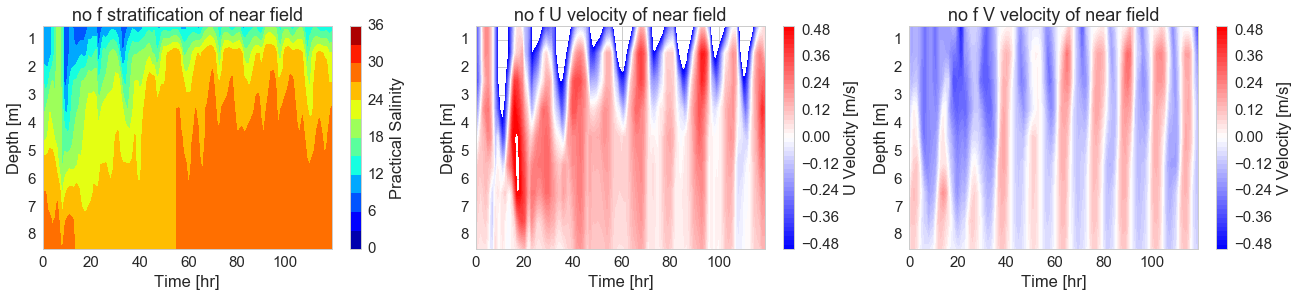

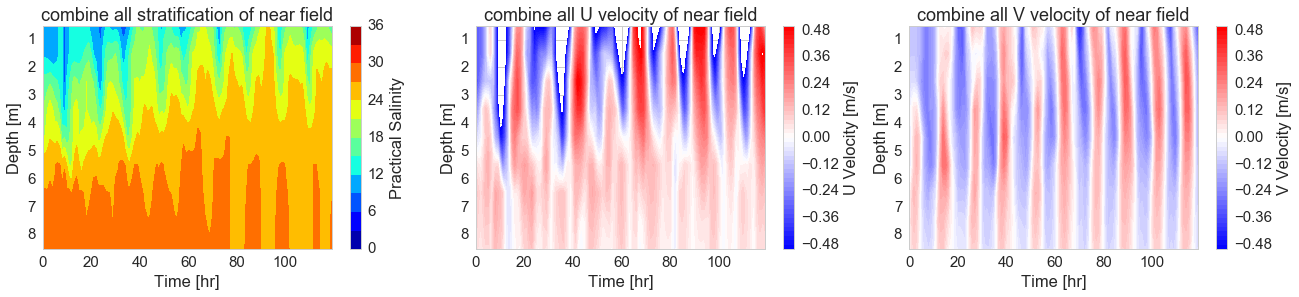

In [7]:
sts.plot_stn('near field')
fig = sts.plot_stratification_current('near field',8,'only river',river_T,river_U,river_V,0,119)
fig = sts.plot_stratification_current('near field',8,'no tides',notide_T,notide_U,notide_V,0,119)
fig = sts.plot_stratification_current('near field',8,'no winds',nowind_T,nowind_U,nowind_V,0,119)
fig = sts.plot_stratification_current('near field',8,'no f',nof_T,nof_U,nof_V,0,119)
fig = sts.plot_stratification_current('near field',8,'combine all',all_T,all_U,all_V,0,119)

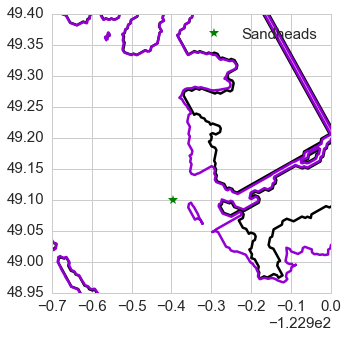

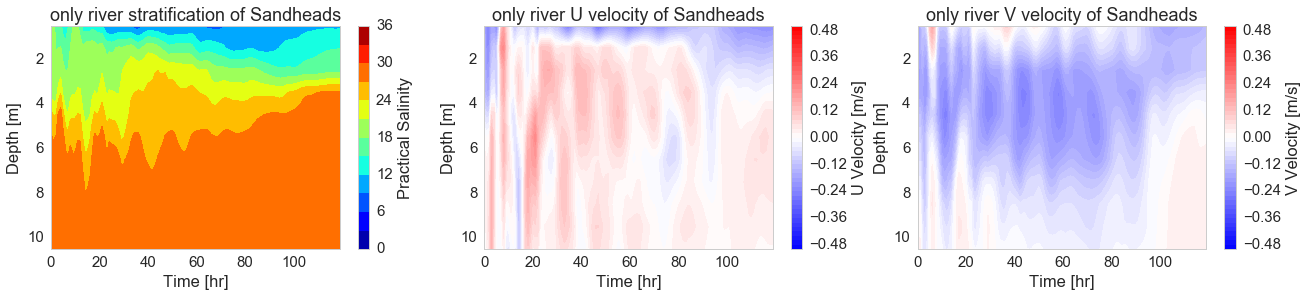

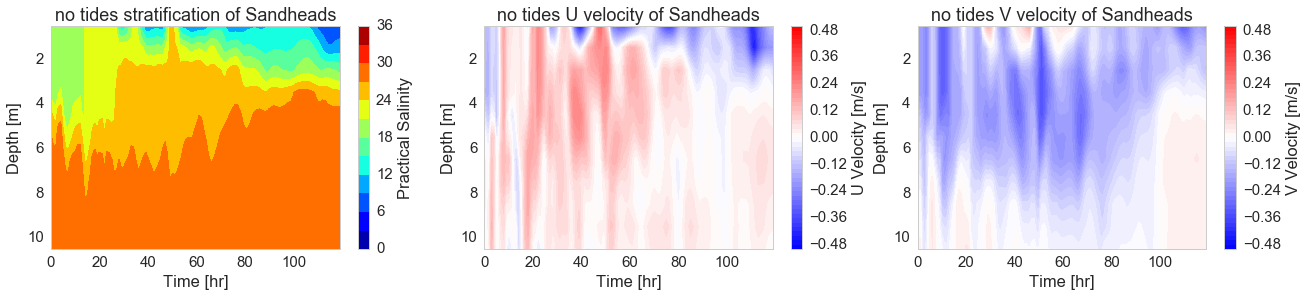

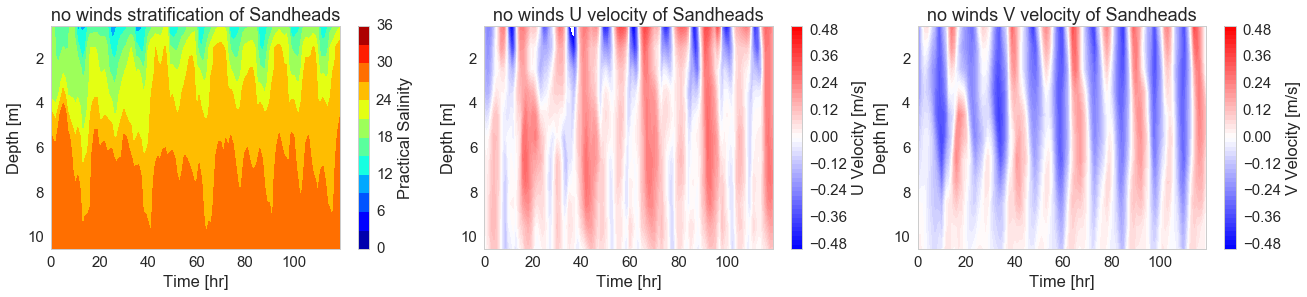

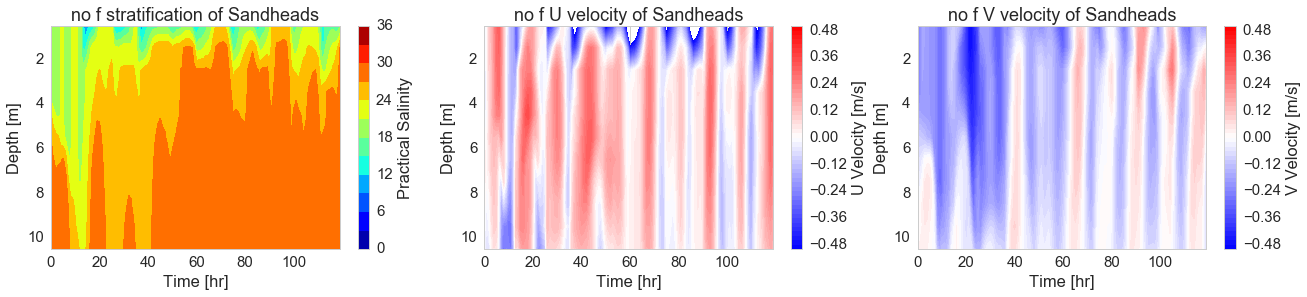

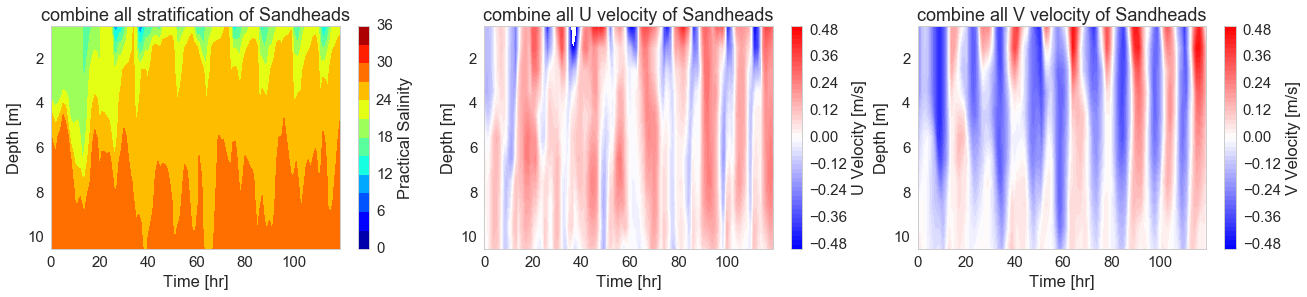

In [8]:
sts.plot_stn('Sandheads')
fig = sts.plot_stratification_current('Sandheads',10,'only river',river_T,river_U,river_V,0,119)
fig = sts.plot_stratification_current('Sandheads',10,'no tides',notide_T,notide_U,notide_V,0,119)
fig = sts.plot_stratification_current('Sandheads',10,'no winds',nowind_T,nowind_U,nowind_V,0,119)
fig = sts.plot_stratification_current('Sandheads',10,'no f',nof_T,nof_U,nof_V,0,119)
fig = sts.plot_stratification_current('Sandheads',10,'combine all',all_T,all_U,all_V,0,119)

# Rmix

In [4]:
## define dates
sd = datetime.datetime(2014,10,1,0,30,tzinfo=pytz.utc)
ed = datetime.datetime(2014,10,31,23,30,tzinfo=pytz.utc)
## tmask
mesh = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/mesh_mask.nc')
tmask = mesh.variables['tmask'][0,:,380:510,240:397]
np_mask = np.abs(1-tmask) 

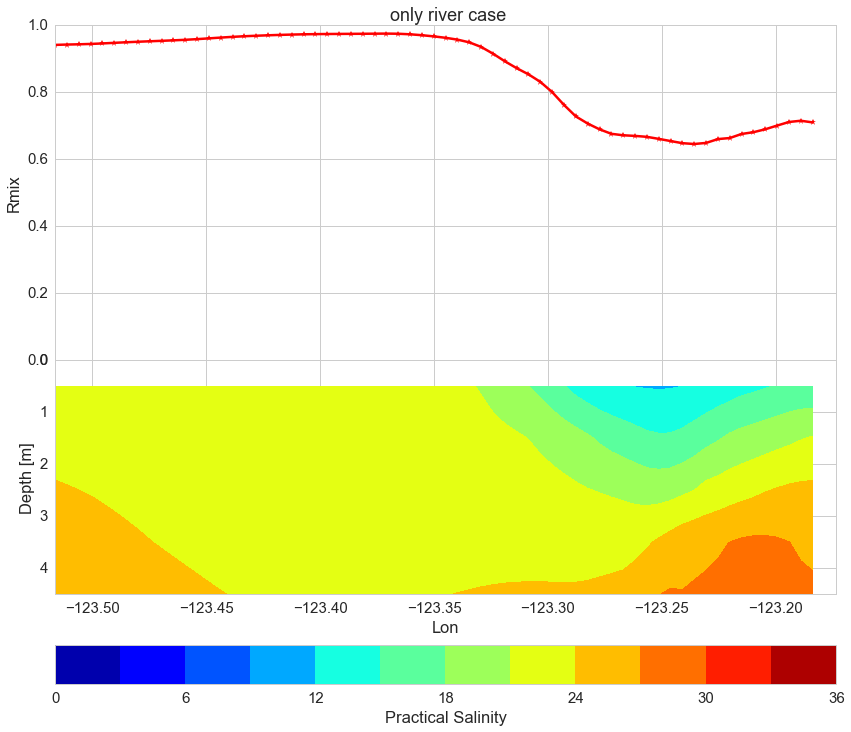

In [12]:
RS.plot_salinity_estuaryAve(river_T,sd,ed,4,np_mask,0,119,title = ' only river case')

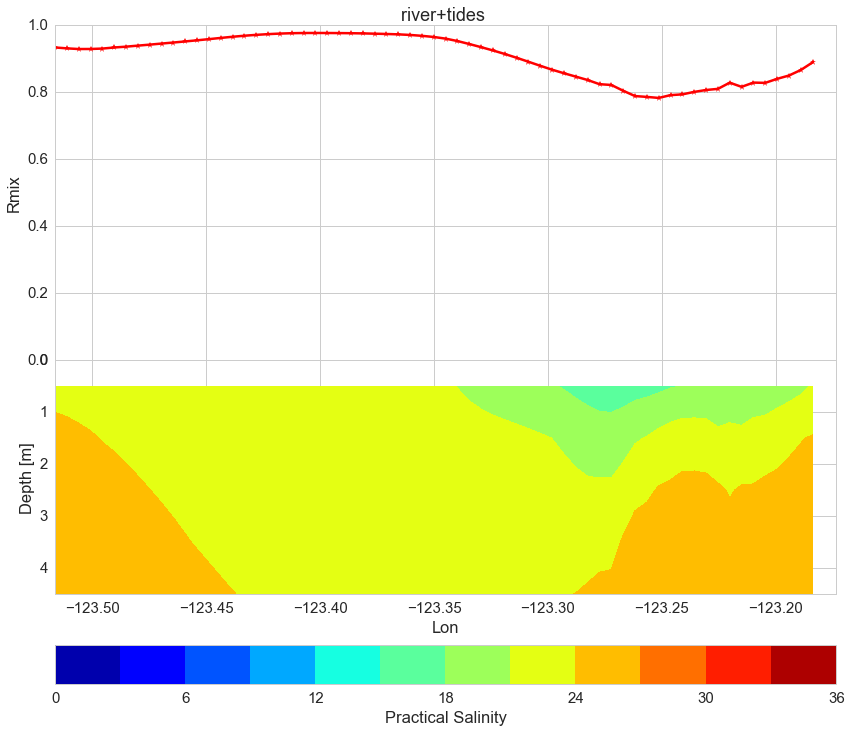

In [13]:
RS.plot_salinity_estuaryAve(nowind_T,sd,ed,4,np_mask,0,119,title = 'river+tides ')

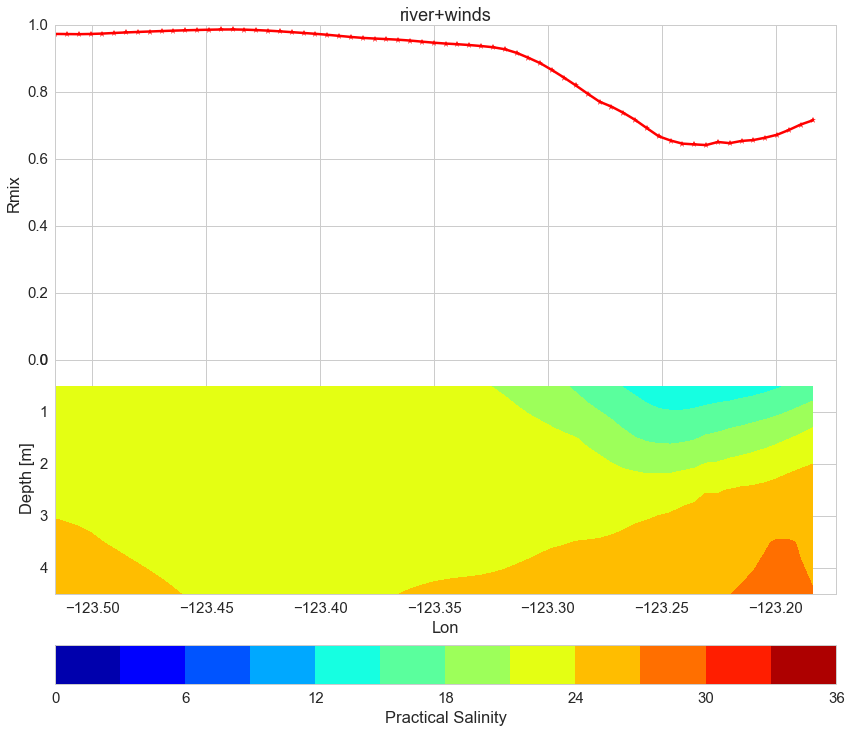

In [14]:
RS.plot_salinity_estuaryAve(notide_T,sd,ed,4,np_mask,0,119,title = 'river+winds')

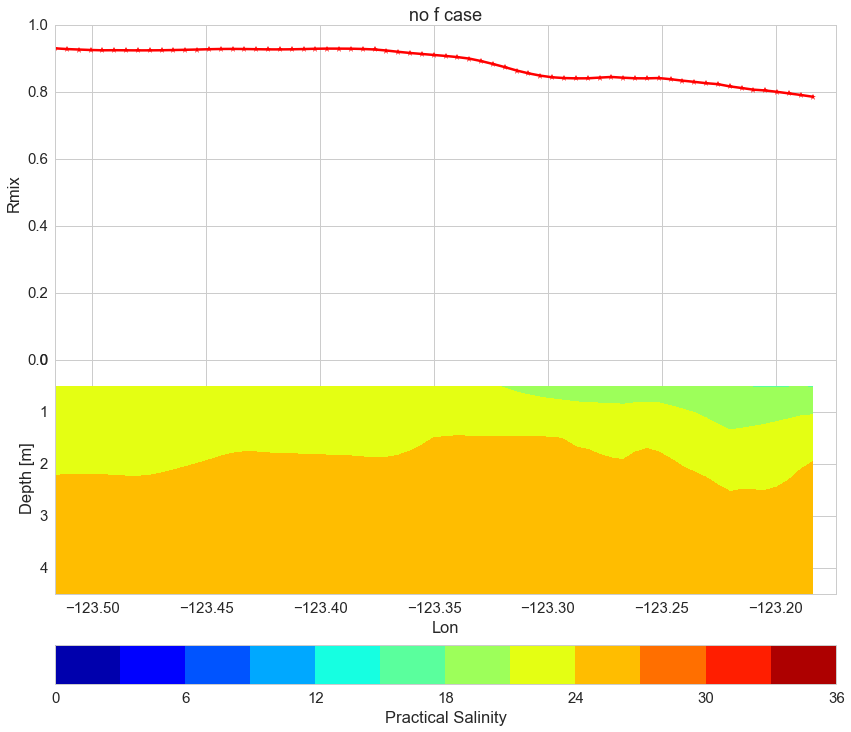

In [15]:
RS.plot_salinity_estuaryAve(nof_T,sd,ed,4,np_mask,0,119,title = 'no f case')

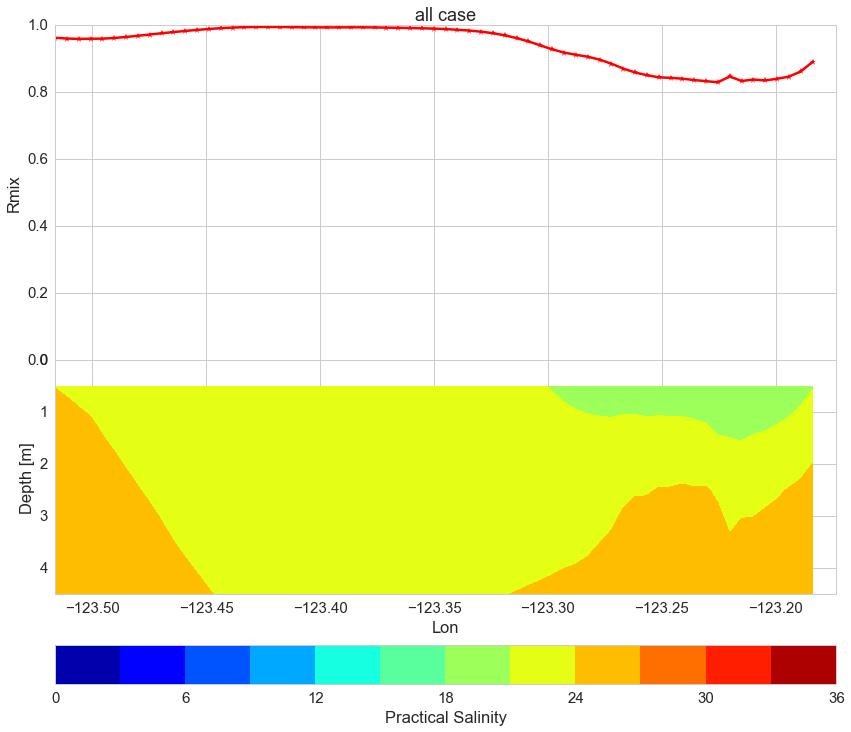

In [16]:
RS.plot_salinity_estuaryAve(all_T,sd,ed,4,np_mask,0,119,title = 'all case')

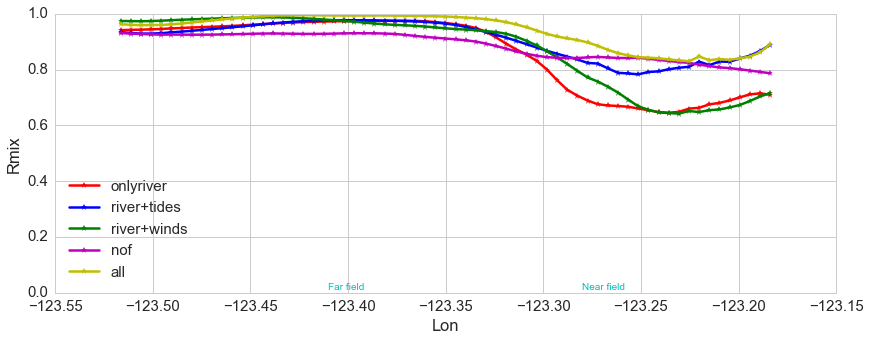

In [17]:
RS.plot_Rmix_together(river_T,nowind_T,notide_T,nof_T,all_T,0,119,np_mask,4)

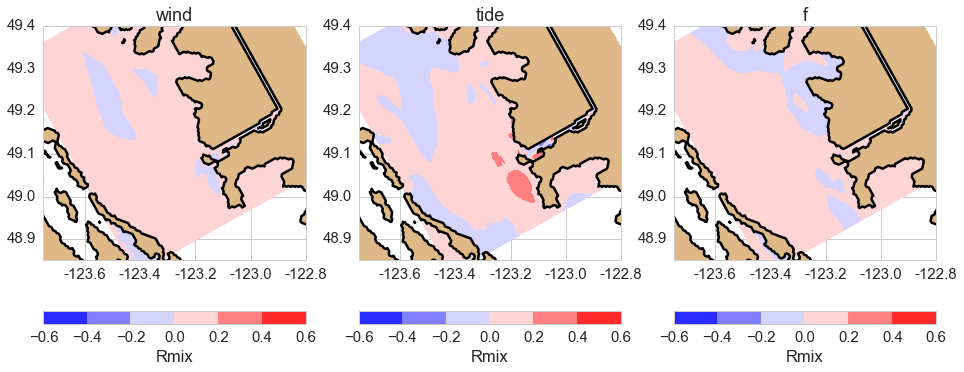

In [18]:
fig = RS.plot_spatial_RmixDiff(river_T,nowind_T,notide_T,nof_T,all_T,0,119,4, np_mask)

# Put each five days chunk together

In [5]:
## for tides
run_low = datetime.datetime(2014,10,1)
run_up = datetime.datetime(2014,11,1)
run_label1 = datetime.datetime(2014,10,1,0)
run_label2 = datetime.datetime(2014,10,6,0)

In [6]:
## for winds
import glob,wind
OP = nc.Dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2014m10d01.nc')
OPlon =OP.variables['nav_lon'][:]-360
OPlat = OP.variables['nav_lat'][:]
filesOP = glob.glob('/results/forcing/atmospheric/GEM2.5/operational/ops_y2014m10d*.nc')
filesOP.sort(key=os.path.basename)
start = '1-Oct-2014'; end = '31-Oct-2014';
start2 = '31-Oct-2014'; end2 = '31-Oct-2014';
endd = '31-Oct-2014';
stations = ['Sandheads']; stationsOP =['Sandheads_OP'];
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')

In [7]:
def plot_each_RmixWindsTides(gridT1,gridT2,gridT3,gridT4,gridT5,tst,ted,np_mask,dep_ind,\
    run_low,run_up,run_label1,run_label2,start, end, start2, end2, stations,stationsOP,\
    OPlon,OPlat,filesOP,t1,t2,duration,key1,key2,sax,eax,day,hour,minute):
    """This function was made to plot the each Rmix for a five day interval, 
    expcet the last to two group, which includes six days, with winds and 
    tides corresponding with time seiries."""
    fig, ax = plt.subplots(1,figsize = (14,3))
    RS.plot_Rmix_together(gridT1,gridT2,gridT3,gridT4,gridT5,tst,ted,np_mask,dep_ind)
    ## load t_tide
    tfile = '/ocean/jieliu/research/meopar/tools/SalishSeaNowcast/tidal_predictions/Point Atkinson_t_tide_compare8_31-Dec-2013_02-Dec-2015.csv'
    ttide, msl = stormtools.load_tidal_predictions(tfile)
    low_ind,up_ind,lab_ind1,lab_ind2 = RS.find_ind_tide(run_low,run_up,run_label1,run_label2)

    ax.plot(ttide.time[low_ind:up_ind], ttide.pred_all[low_ind:up_ind])
    ax.plot([ttide.time[lab_ind1],ttide.time[lab_ind1]],[-3.5,3.5],'y-',label = run_label1)
    ax.plot([ttide.time[lab_ind2],ttide.time[lab_ind2]],[-3.5,3.5],'r-',label = run_label2)
    ax.grid('on')
    ax.legend()
    ax.set_ylim(-3.5,3.5)

    wind.compare_winds_label(start, end, start2, end2, stations,stationsOP,OPlon,OPlat,filesOP,t1,t2,\
                           duration,key1,key2,sax,eax,day,hour,minute)

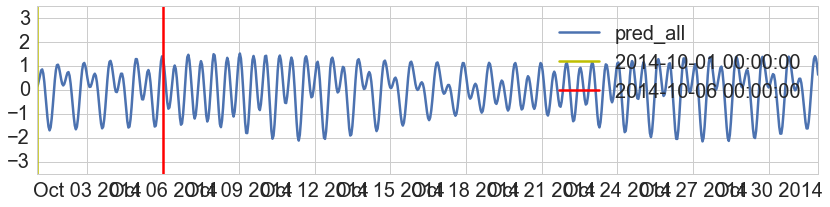

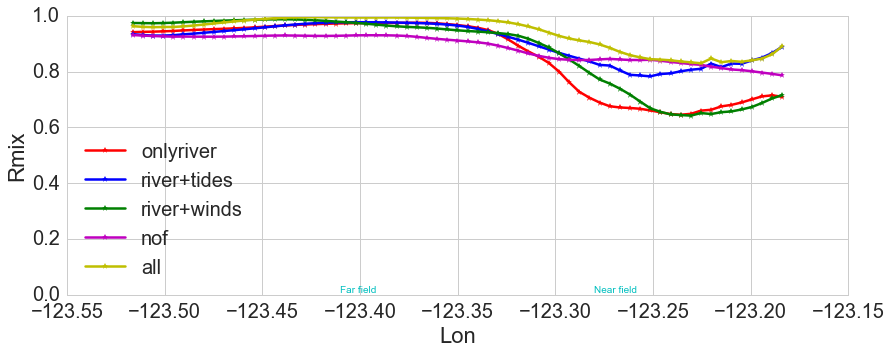

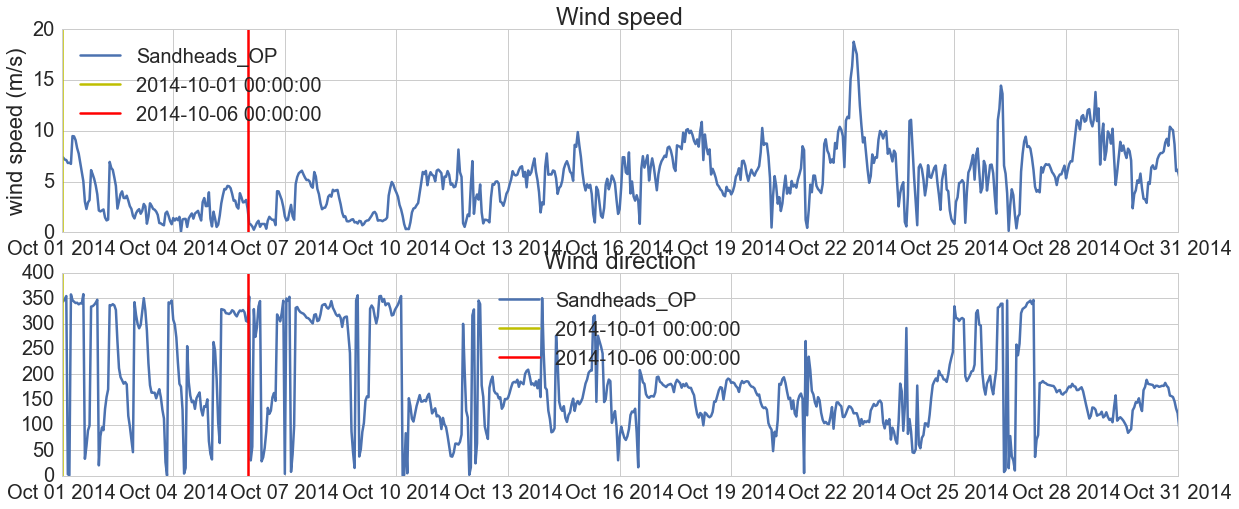

In [8]:
plot_each_RmixWindsTides(river_T,nowind_T,notide_T,nof_T,all_T,0,119,np_mask,4,run_low,run_up,run_label1,run_label2,\
        start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,run_label1,run_label2,\
                       27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)

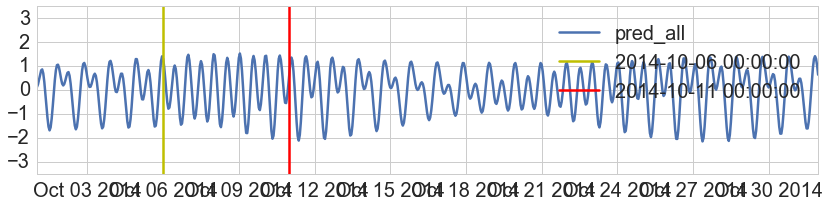

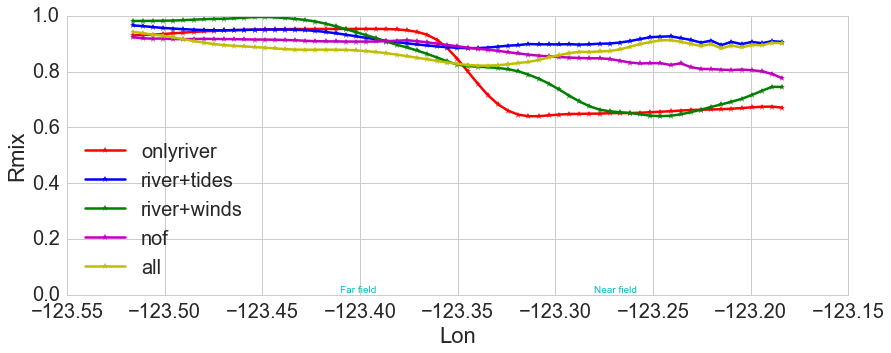

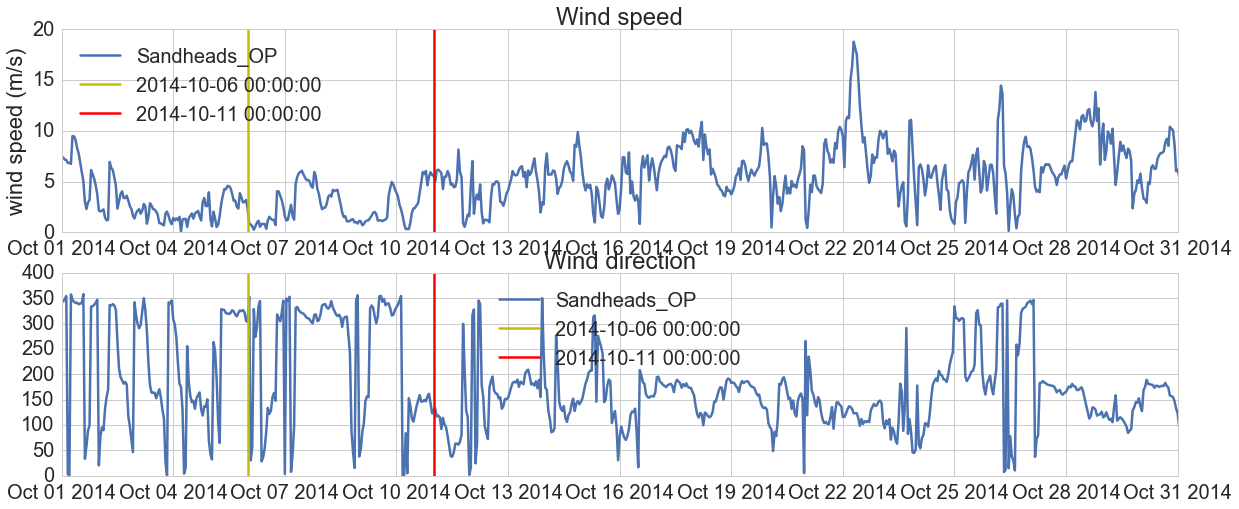

In [9]:
run_label1 = datetime.datetime(2014,10,6,0)
run_label2 = datetime.datetime(2014,10,11,0)
plot_each_RmixWindsTides(river_T,nowind_T,notide_T,nof_T,all_T,120,239,np_mask,4,run_low,run_up,run_label1,run_label2,\
        start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,run_label1,run_label2,\
                       27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)

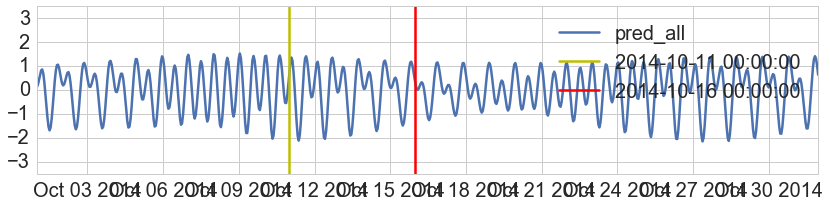

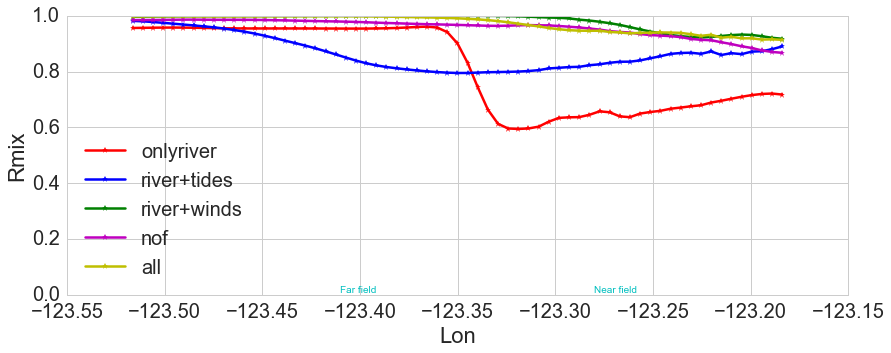

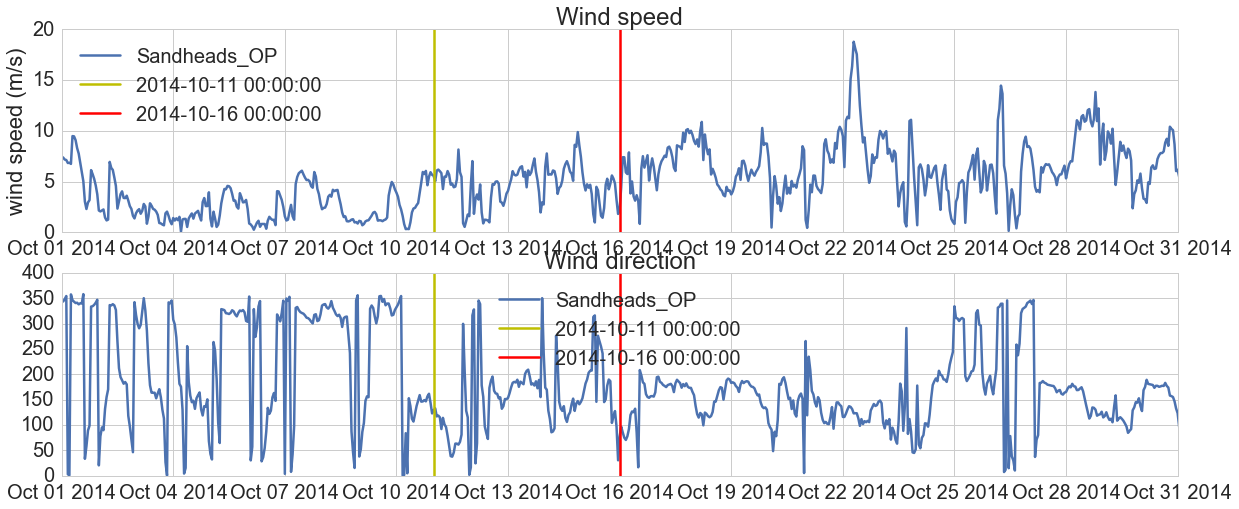

In [10]:
run_label1 = datetime.datetime(2014,10,11,0)
run_label2 = datetime.datetime(2014,10,16,0)
plot_each_RmixWindsTides(river_T,nowind_T,notide_T,nof_T,all_T,240,359,np_mask,4,run_low,run_up,run_label1,run_label2,\
        start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,run_label1,run_label2,\
                       27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)

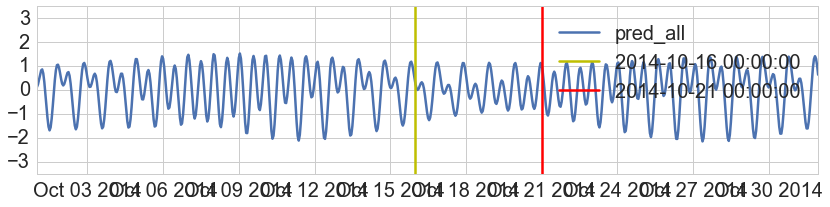

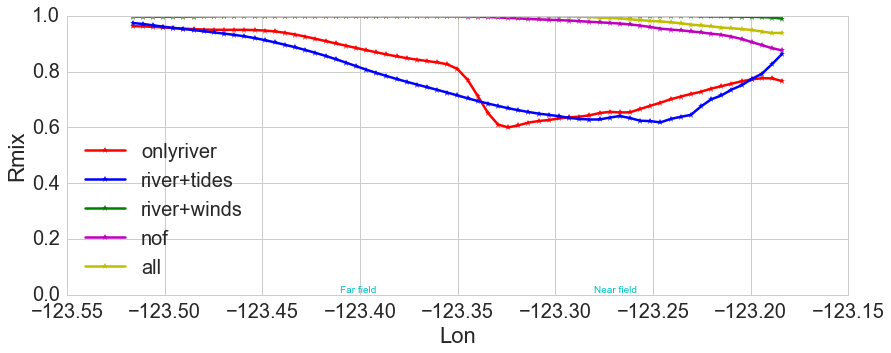

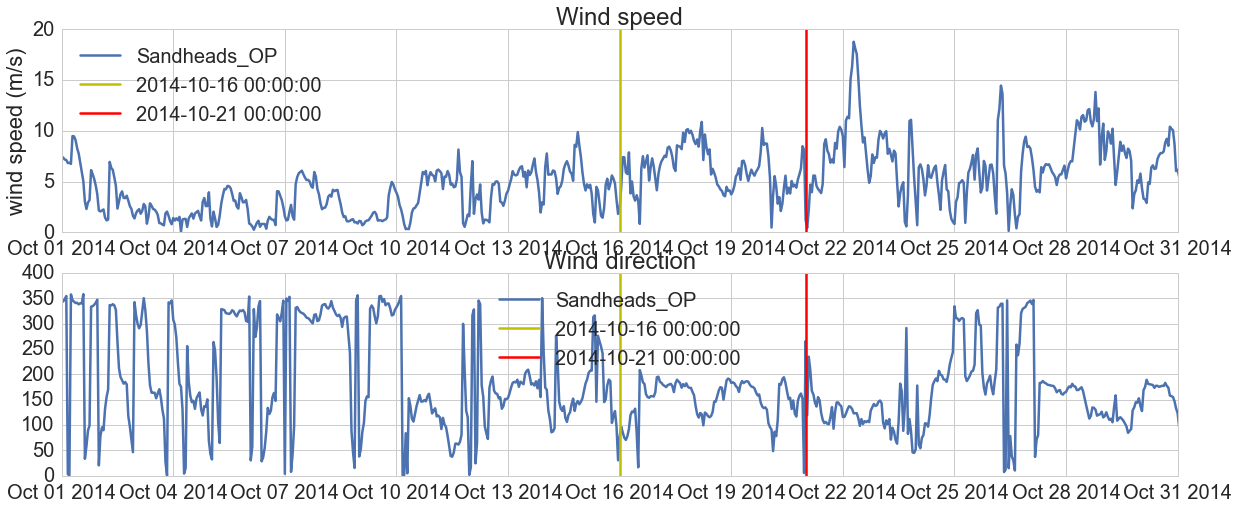

In [11]:
run_label1 = datetime.datetime(2014,10,16,0)
run_label2 = datetime.datetime(2014,10,21,0)
plot_each_RmixWindsTides(river_T,nowind_T,notide_T,nof_T,all_T,360,479,np_mask,4,run_low,run_up,run_label1,run_label2,\
        start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,run_label1,run_label2,\
                       27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)

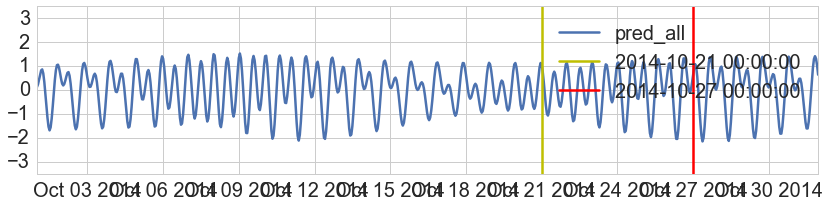

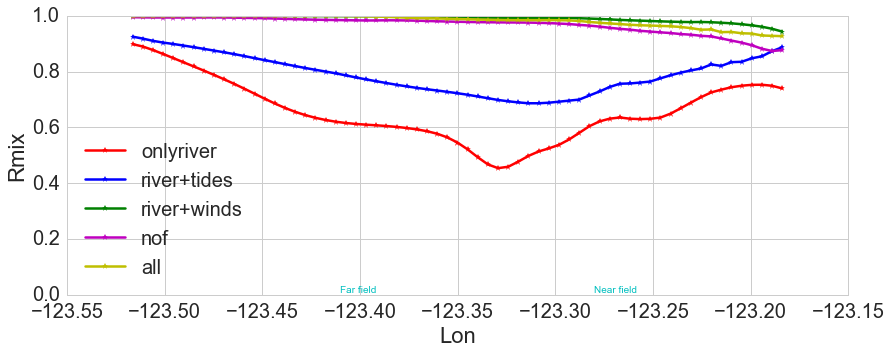

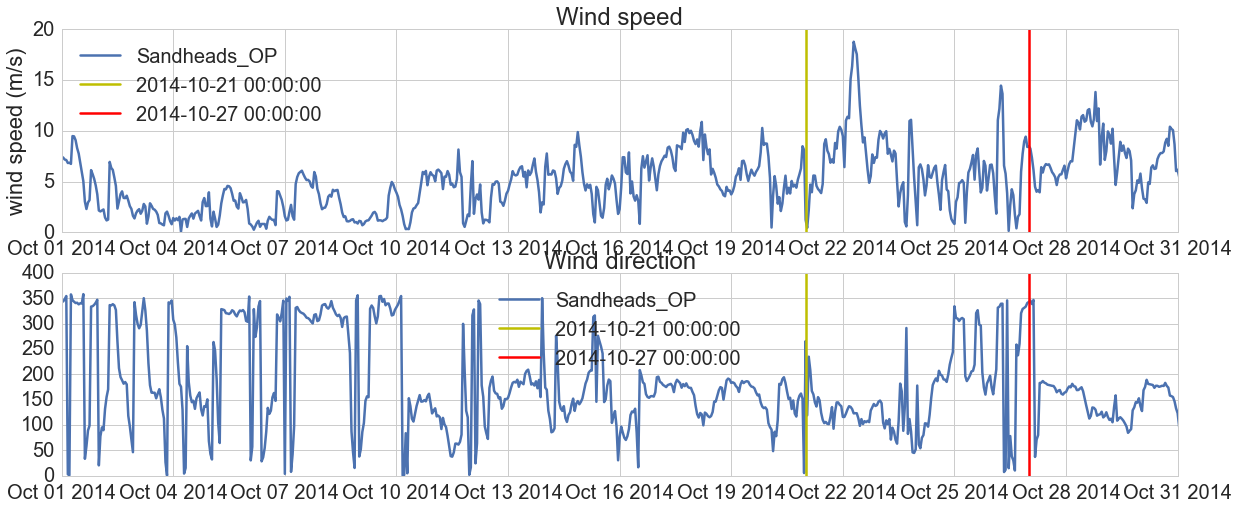

In [12]:
run_label1 = datetime.datetime(2014,10,21,0)
run_label2 = datetime.datetime(2014,10,27,0)
plot_each_RmixWindsTides(river_T,nowind_T,notide_T,nof_T,all_T,480,623,np_mask,4,run_low,run_up,run_label1,run_label2,\
        start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,run_label1,run_label2,\
                       27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)

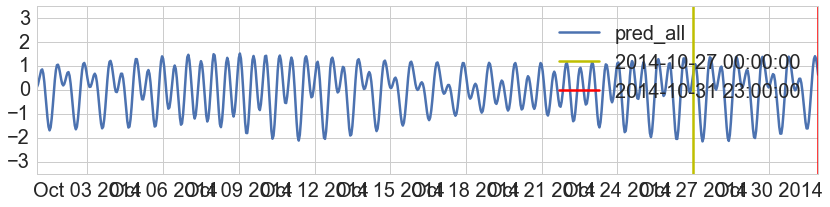

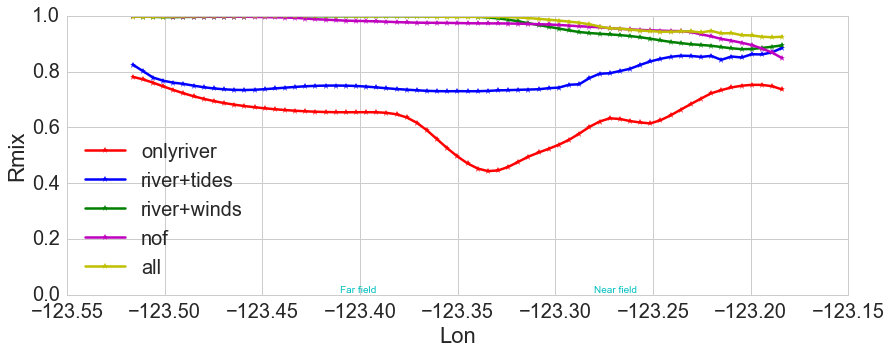

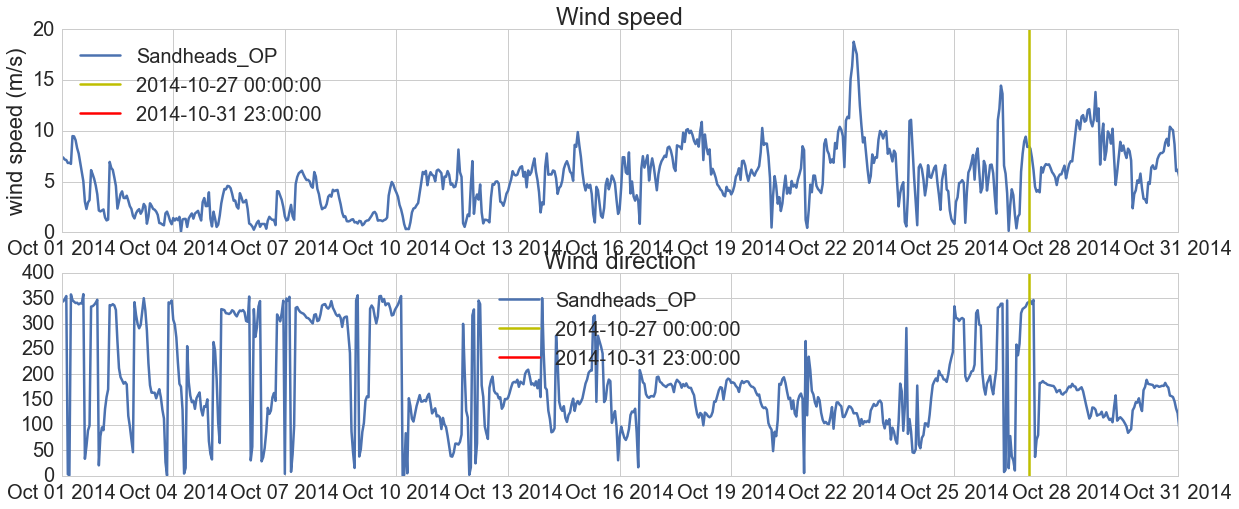

In [13]:
run_label1 = datetime.datetime(2014,10,27,0)
run_label2 = datetime.datetime(2014,10,31,23)
plot_each_RmixWindsTides(river_T,nowind_T,notide_T,nof_T,all_T,624,743,np_mask,4,run_low,run_up,run_label1,run_label2,\
        start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,run_label1,run_label2,\
                       27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)